<a href="https://colab.research.google.com/github/Dansouza-web/-An-lise-de-Dados-Cl-nicos/blob/main/Dados_Cl%C3%ADnicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Qual o objetivo da Análise**?
  ## O objetivo deste projeto é analisar dados clínicos de pacientes com o intuito de detectar padrões que indiquem a ocorrência de um ataque cardíaco. A base contém variáveis fisiológicas como idade, pressão, frequência cardíaca e níveis de enzimas cardíacas.

In [44]:
#Começo importando as bibliotecas que vou utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
#Dou carga da base e df_clinicos.head() para ter uma primeira impressão da base
df_clinicos = pd.read_csv('Medicaldataset.csv')
df_clinicos.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [46]:
#Renomeio o nome das colunas para ficar mais fácil a leitura
df_clinicos.columns = ['Idade','Gênero', 'Freq_Cardiaca','Pressão_Arterial_Sistólica','Pressão_Arterial_Diastólica','Nivel_Glicose','Enzima_Cardiaca','Proteina_Cardiaca','Resultado']
df_clinicos

,Idade,Gênero,Freq_Cardiaca,Pressão_Arterial_Sistólica,Pressão_Arterial_Diastólica,Nivel_Glicose,Enzima_Cardiaca,Proteina_Cardiaca,Resultado
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


##***FAZENDO ANÁLISE EXPLORÁTORIA***:

In [47]:
df_clinicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1319 non-null   int64  
 1   Gênero                       1319 non-null   int64  
 2   Freq_Cardiaca                1319 non-null   int64  
 3   Pressão_Arterial_Sistólica   1319 non-null   int64  
 4   Pressão_Arterial_Diastólica  1319 non-null   int64  
 5   Nivel_Glicose                1319 non-null   float64
 6   Enzima_Cardiaca              1319 non-null   float64
 7   Proteina_Cardiaca            1319 non-null   float64
 8   Resultado                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [48]:
df_clinicos.describe().round()

,Idade,Gênero,Freq_Cardiaca,Pressão_Arterial_Sistólica,Pressão_Arterial_Diastólica,Nivel_Glicose,Enzima_Cardiaca,Proteina_Cardiaca
count,1319.0,1319.0,1319.0,1319.0,1319.0,1319.0,1319.0,1319.0
mean,56.0,1.0,78.0,127.0,72.0,147.0,15.0,0.0
std,14.0,0.0,52.0,26.0,14.0,75.0,46.0,1.0
min,14.0,0.0,20.0,42.0,38.0,35.0,0.0,0.0
25%,47.0,0.0,64.0,110.0,62.0,98.0,2.0,0.0
50%,58.0,1.0,74.0,124.0,72.0,116.0,3.0,0.0
75%,65.0,1.0,85.0,143.0,81.0,170.0,6.0,0.0
max,103.0,1.0,1111.0,223.0,154.0,541.0,300.0,10.0


In [49]:
df_clinicos.isnull().sum() # não há nenhum valor faltante

,0
Idade,0
Gênero,0
Freq_Cardiaca,0
Pressão_Arterial_Sistólica,0
Pressão_Arterial_Diastólica,0
Nivel_Glicose,0
Enzima_Cardiaca,0
Proteina_Cardiaca,0
Resultado,0


In [50]:
df_clinicos

,Idade,Gênero,Freq_Cardiaca,Pressão_Arterial_Sistólica,Pressão_Arterial_Diastólica,Nivel_Glicose,Enzima_Cardiaca,Proteina_Cardiaca,Resultado
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


##***TRATAMENTO E LIMPEZA***

In [52]:
#Uso .map do pandas para mudar os valores da coluna Genêro
df_clinicos['Gênero'] = df_clinicos['Gênero'].map({1: 'Masculino', 0: 'Feminino'})
# E o .astype para mudar o tipo de dado do resultado
df_clinicos['Resultado'] = df_clinicos['Resultado'].astype('category')

#***Visualizando Dados com Seaborn***

<Axes: xlabel='Resultado', ylabel='count'>

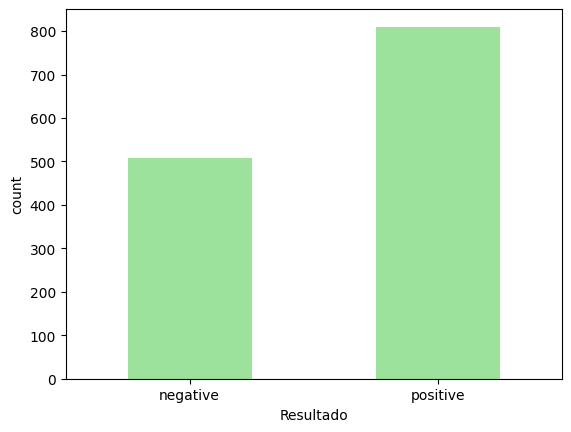

In [53]:
#Distribuição dos Diagnósticos
sns.countplot(x='Resultado', data=df_clinicos,color='lightgreen',width=0.5)

<ipython-input-54-73e1b9faad8c>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Resultado', y='Proteina_Cardiaca', data=df_clinicos, scale='width', color='darkred')


<Axes: xlabel='Resultado', ylabel='Proteina_Cardiaca'>

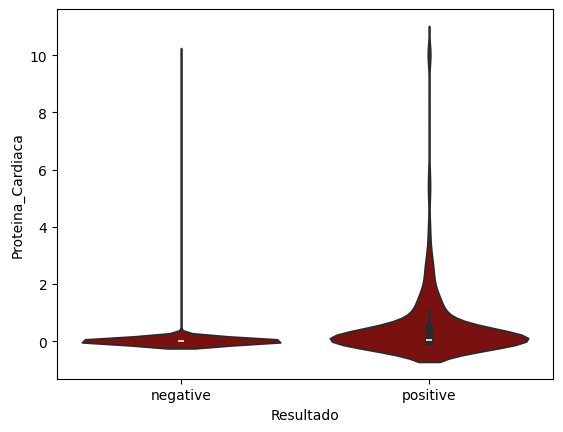

In [54]:
#Proteina Cardiaca por Diagnóstico
sns.violinplot(x='Resultado', y='Proteina_Cardiaca', data=df_clinicos, scale='width', color='darkred')

<Axes: >

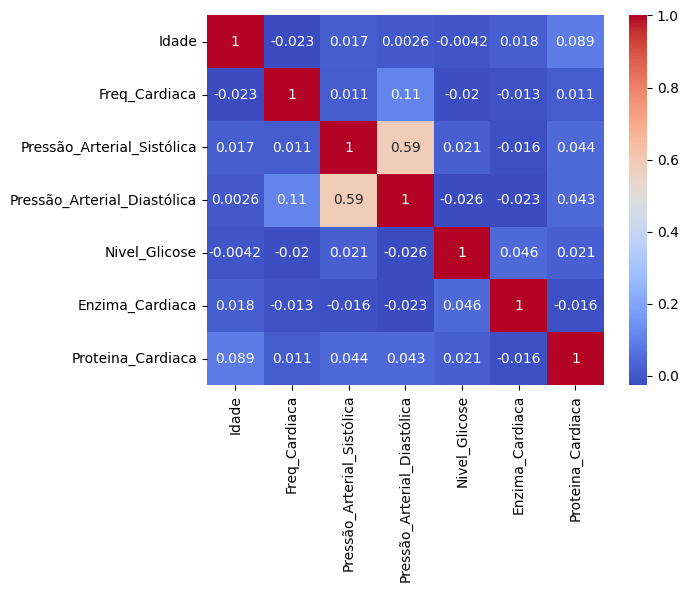

In [55]:
# Verificando se á Correlação
sns.heatmap(df_clinicos.corr(numeric_only=True), annot=True, cmap='coolwarm')

##***ANÁLISE ESTÁTISTICAS E INSIGHT***##

In [56]:
#Há tendência de frequência mais alta entre positivos?
df_clinicos.groupby('Resultado')['Freq_Cardiaca'].agg(['mean', 'std']).round()

<ipython-input-56-06b5d42f6452>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clinicos.groupby('Resultado')['Freq_Cardiaca'].agg(['mean', 'std']).round()


,mean,std
Resultado,,
negative,78.0,48.0
positive,79.0,54.0


In [57]:
#Níveis de glicose estão mais elevados em pacientes com infarto?
df_clinicos.groupby('Resultado')['Nivel_Glicose'].agg(['mean', 'median','std'])

<ipython-input-57-93ac9f8a1ac2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clinicos.groupby('Resultado')['Nivel_Glicose'].agg(['mean', 'median','std'])


,mean,median,std
Resultado,,,
negative,149.757760,117.0,78.407363
positive,144.671605,116.0,72.628716


<Axes: xlabel='Enzima_Cardiaca', ylabel='Proteina_Cardiaca'>

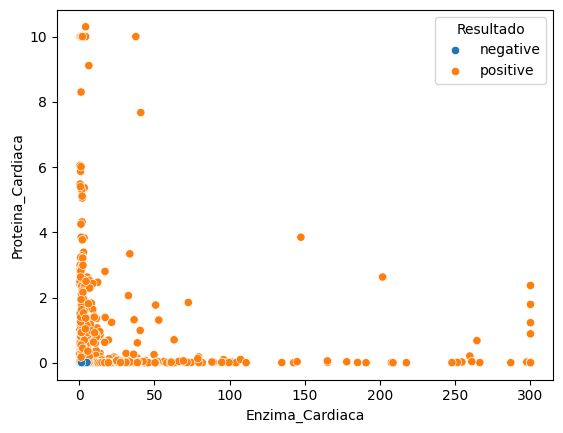

In [58]:
#Quanto maior a Enzima Cardiaca, maior Proteína Cardiaca? Isso vale para os dois grupos?
sns.scatterplot(x='Enzima_Cardiaca',y='Proteina_Cardiaca',hue='Resultado', data=df_clinicos)

In [59]:
#Pacientes positivos apresentam pressão mais alta ou mais baixa?
df_clinicos.groupby('Resultado')[['Pressão_Arterial_Sistólica','Pressão_Arterial_Diastólica']].mean().round()

<ipython-input-59-22a330c79781>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clinicos.groupby('Resultado')[['Pressão_Arterial_Sistólica','Pressão_Arterial_Diastólica']].mean().round()


,Pressão_Arterial_Sistólica,Pressão_Arterial_Diastólica
Resultado,,
negative,128.0,72.0
positive,127.0,72.0


#MODELAGEM E ÁRVORE DE DECISÃO

In [60]:
#convertendo dados para 0 e 1 com get dummies
df_clinicos_modelo = pd.get_dummies(df_clinicos,drop_first=True)

In [61]:
#separandoa as váriaveis
y = df_clinicos['Resultado']
X = pd.get_dummies(df_clinicos.drop('Resultado', axis=1), drop_first=True)

In [62]:
#Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#criando o modelo de árvore
modelo = DecisionTreeClassifier(random_state=42,max_depth=4)
modelo.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [64]:
#Previsando e Avaliando
y_pred = modelo.predict(X_test)
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório da Classificação:\n", classification_report(y_test, y_pred))

Matriz de Confusão:
 [[ 95   6]
 [  3 160]]

Relatório da Classificação:
               precision    recall  f1-score   support

    negative       0.97      0.94      0.95       101
    positive       0.96      0.98      0.97       163

    accuracy                           0.97       264
   macro avg       0.97      0.96      0.96       264
weighted avg       0.97      0.97      0.97       264



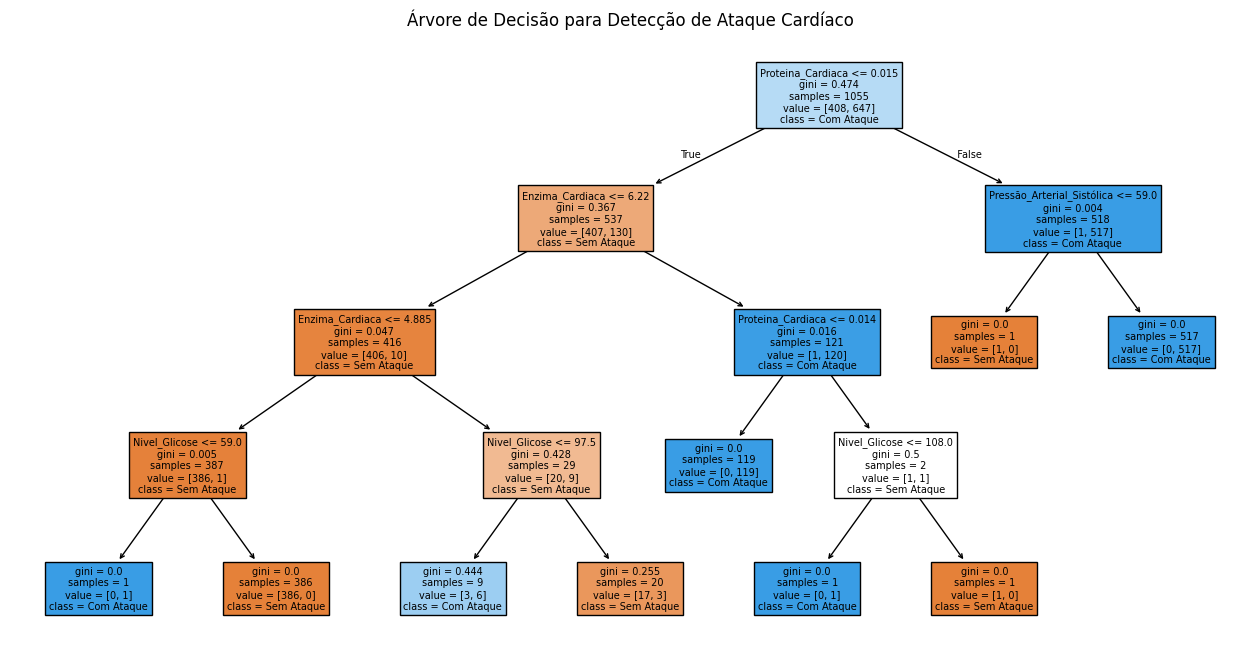

In [65]:
#Visualizando a Árvore de Decisão
plt.figure(figsize=(16,8))
plot_tree(modelo, feature_names=X.columns, class_names=['Sem Ataque', 'Com Ataque'], filled=True)
plt.title("Árvore de Decisão para Detecção de Ataque Cardíaco")
plt.show()

<ipython-input-66-64767c183a2f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias, y=importancias.index, palette='viridis')


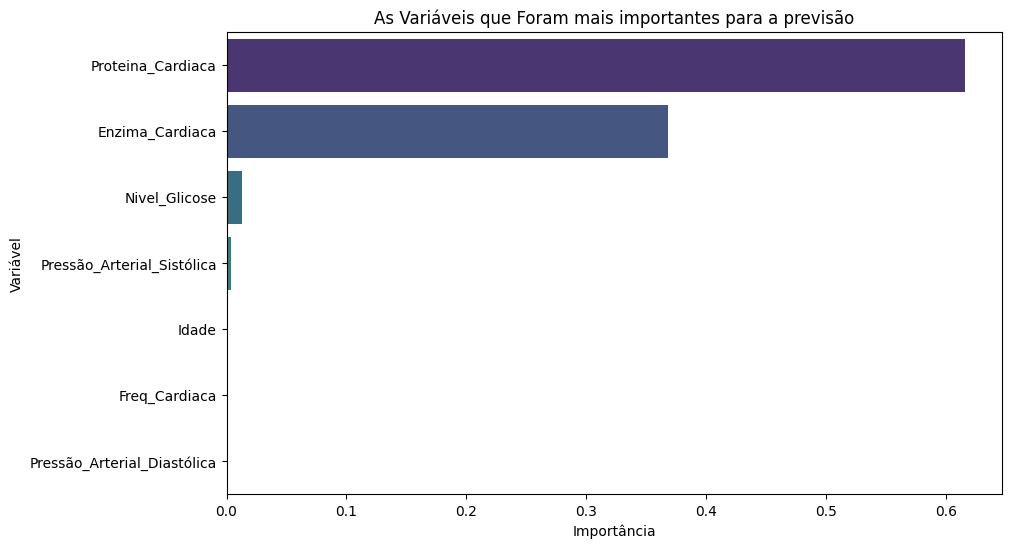

In [66]:
#Para Descobrir quais foram as variaveis mais importante para a previsão
importancias = pd.Series(modelo.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x=importancias, y=importancias.index, palette='viridis')
plt.title('As Variáveis que Foram mais importantes para a previsão')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()